
### 1. Import some libraries

In [1]:
import matplotlib.pyplot as plt
from Agent import Agent
from collections import namedtuple, deque
from pyvirtualdisplay import Display
from unityagents import UnityEnvironment
import numpy as np
%matplotlib inline

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()


### 2. Load the Banana Collector Unity environment

<b>Before running the code cell below</b>, change the file_name parameter to match the location of the Unity environment that you downloaded:</br>
  - <b>Mac</b>: "path/to/Banana.app"
  - <b>Windows (x86)</b>: "path/to/Banana_Windows_x86/Banana.exe"
  - <b>Windows (x86_64)</b>: "path/to/Banana_Windows_x86_64/Banana.exe"
  - <b>Linux (x86)</b>: "path/to/Banana_Linux/Banana.x86"
  - <b>Linux (x86_64)</b>: "path/to/Banana_Linux/Banana.x86_64"

In [2]:
# Load the unity environment on Windows
env = UnityEnvironment(file_name="../Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 



### 3. Train the agent

Note that the agent will stop training automatically if the rewards fo over a threshold (15 by default)

Episode 100	Average Score: 0.70
Episode 200	Average Score: 4.21
Episode 300	Average Score: 7.23
Episode 400	Average Score: 10.88
Episode 500	Average Score: 13.40
Episode 600	Average Score: 14.06
Episode 632	Average Score: 15.00
Environment solved in 532 episodes!	Average Score: 15.00


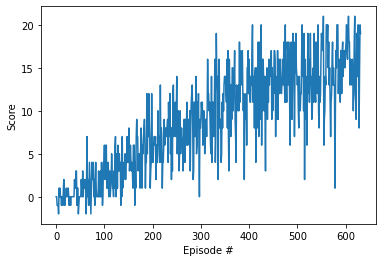

In [3]:
def dqn(n_episodes=2000, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                                                  # list containing scores from each episode
    scores_window = deque(maxlen=100)                            # last 100 scores
    eps = eps_start                                              # initialize epsilon
    brain_name = env.brain_names[0]                              # get default brain name
    brain = env.brains[brain_name]                               # set brain 0 as default brain
    action_size = brain.vector_action_space_size                 # estimate action space size
    env_info = env.reset(train_mode=True)[brain_name]            # reset environment
    state = env_info.vector_observations[0]                      # get the current state
    state_size = len(state)                                      # get the state size                                          
    agent = Agent(state_size, action_size, seed = 0)             # Initialize agent

    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]        # reset environment
        state = env_info.vector_observations[0]                  # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                       # get action from agent
            env_info = env.step(action)[brain_name]              # advance one step in environment
            next_state = env_info.vector_observations[0]         # get the next state
            reward = env_info.rewards[0]                         # get the reward
            done = env_info.local_done[0]                        # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env.close()